# The Matrix Inverse
The matrix inverse is central to solving matrix equations in practical applications, including fitting statistical models to data (eg general linear models and regression). We will understand what the matrix inverse is, when it can and cant be computed, how to compute it, and how to interpret it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## The Matrix Inverse
the inverse of a matrix $\mathbf{A}$ is another matrix $\mathbf{A}^{-1}$ that multiplies $\mathbf{A}$ to produce the identity matrix, that is, $\mathbf{A}^{-1}\mathbf{A}=\mathbf{I}$. 

This can be seen as cancelling a matrix, or alternately, linearly transform a matrix into the identity matrix; The matrix inverse contains the  transformation, and matrix multiplication is the mechanism of applying that transformation to the matrix.

We need to 'cancel' a matrix in order to solve problems that can be expressed in the form $\mathbf{A}x=b$, where $\mathbf{A}$ and $b$ are known quantities, and we want to solve for $x$. We can solve it as follows:

$\mathbf{A}x=b$<br>
$\mathbf{A}^{-1}\mathbf{A}x =\mathbf{A}^{-1}b$<br>
$\mathbf{I}x=\mathbf{A}^{-1}b$<br>
$x = \mathbf{A}^{-1}b$

## Types of Inverses and Conditions for Invertibility
There are three different kinds of inverses that have different conditions for invertibility:
1. **Full Inverse**<br>This means $\mathbf{A}^{-1}\mathbf{A}=\mathbf{AA}^{-1}=\mathbf{I}$. There are two conditions for a matrix to have a full inverse:<br> - Square<br>- Full-Rank<br> Every square full-rank matrix has an inverse and every matrix that has an inverse is square and full-rank. This is also simply called the *inverse*.
2. **One-Sided inverse**<br> A one-sided inverse can transform a rectangular matrix into the identity matrix, but it works only for one multiplication order. In particular, a tall matrix can have a *left-inverse*, meaning $\mathbf{LT}=\mathbf{I}$, but $\mathbf{TL}\neq\mathbf{I}$. And a wide matrix $\mathbf{W}$ can have a *right-inverse*, meaning that $\mathbf{WR}=\mathbf{I}$ but $\mathbf{RW}\neq\mathbf{I}$.<br> A nonsquare matrix has a one-sided inverse only if it has the maximum possible rank. That is, a tall matrix is left-inverse if it a rank-$N$ (full column matrix) while a wide matrix has a right inverse if it it a rank-$M$ (full row matrix).
3. **Pseudoinverse**<br>Every matrix has a pseudoinverse, regardless of its shape and rank. If the matrix is square, full-rank, then it's pseudoinverse is the full inverse. Likewise, if the matrix is nonsquare and maximum possible rank, then the pseudoinverse is the the left inverse (for tall matrices) or the right inverse (for wide matrices). But a reduced rank matrix still has a pseudoinverse, in which case the pseudoinverse transforms the singular matrix into another matrix that is close but not equal to the identity matrix.<br> Matrices that do not have full or one-sided inverse are called singular or non-invertible. This is the same as labelling a matrix *reduced-rank* or *rank-deficient*.

## Computing the Inverse
There are a few shortcuts for special matrices-

### Inverse of a 2x2 Matrix
To Invert a $2\times 2$ matrix, swap the diagonal elements, multiply the off-diagonal elements by $-1$, and divide by the determinant. The algorithm will produce a matrix that transforms the original matrix into the identity matrix.

$\mathbf{A} = \begin{bmatrix}a&b\\ c&d\end{bmatrix}$<br>

$\mathbf{A}^{-1} = \frac{1}{ad-bc}\begin{bmatrix}d&-b\\ -c&a\end{bmatrix}$<br>

$\mathbf{AA}^{-1} = \begin{bmatrix}a&b\\ c&d\end{bmatrix}\frac{1}{ad-bc}\begin{bmatrix}d&-b\\ -c&a\end{bmatrix}$
$= \frac{1}{ad-bc}\begin{bmatrix}ad-bc&0\\ 0&ad-bc\end{bmatrix}$
$=\begin{bmatrix}1&0\\ 0&1\end{bmatrix}$

Here is a numerical example:
$\begin{bmatrix}1&4\\2&7\end{bmatrix}\begin{bmatrix}7&-4\\ -2&1\end{bmatrix}\frac{1}{7-8}=\begin{bmatrix} (7-8)&(-4+4)\\(14-14)&(-8+7)\end{bmatrix}\frac{1}{-1} = \begin{bmatrix}1&0\\ 0&1\end{bmatrix}$

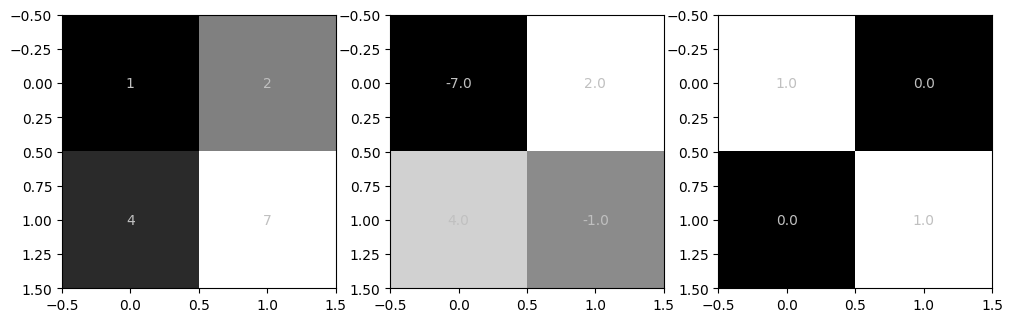

In [12]:
# we can compute the same operation as above:
A = np.array([[1,4],[2,7]])
Ainv = np.linalg.inv(A)
I = A@Ainv

fig,ax = plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(A,'gray')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax[0].text(i,j,A[i,j],ha="center", va="center",color='silver')
ax[1].imshow(Ainv,'gray')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax[1].text(i,j,Ainv[i,j],ha="center", va="center",color='silver')
ax[2].imshow(I,'gray')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax[2].text(i,j,I[i,j],ha="center", va="center",color='silver')

### Inverse of a Diagonal Matrix
There is also a shortcut to compute the inverse of a diagonal matrix- 

The insight is that the product of two diagonal matrices is simply the diagonal elements scalar multiplied. So We simply invert the diagonal elements, ignoring the off-diagonal zeros.

$\begin{bmatrix}2&0&0\\ 0&3&0\\ 0&0&4\end{bmatrix}\begin{bmatrix}b&0&0\\ 0&c&0\\ 0&0&d\end{bmatrix}=\begin{bmatrix}2b&0&0\\ 0&3c&0\\ 0&0&4d\end{bmatrix}$

Here, setting $b=1/2,c=1/3,d=1/4$ will result in the inverse matrix.

Note once again, that if a diagonal element is 0, then the matrix is reduced rank and therefore has no full-inverse.

### Inverting any Square Full-Rank Matrix
The algorithm to compute the inverse involves four intermediate matrices, called the *minors*,*grid*,*cofactors*, and *adjugate* matrices:

- **The Minors Matrix**<br>This matrix comprises determinants of submatrices. Each element $m_{i,j}$ of the minors matrix is the determinant of the submatrix by excluding the $i$th row and $j$th column.
- **The Grid Matrix**<br>The grid matrix is a checkerboard of alternating $+1$s and $-1$s. It is computed using the following formula:<br>$g_{i,j}=(-1)^{i+j}$
- **The Cofactors Matrix**<br>The cofactors matrix is the Hadamard multiplication of the minors matrix with the grid matrix.
- **The Adjugate Matrix**<br> This is the transpose of the cofactors matrix, scalar mutliplied by the inverse of the determinant of the original matrix. The adjugate is the inverse of the original matrix.

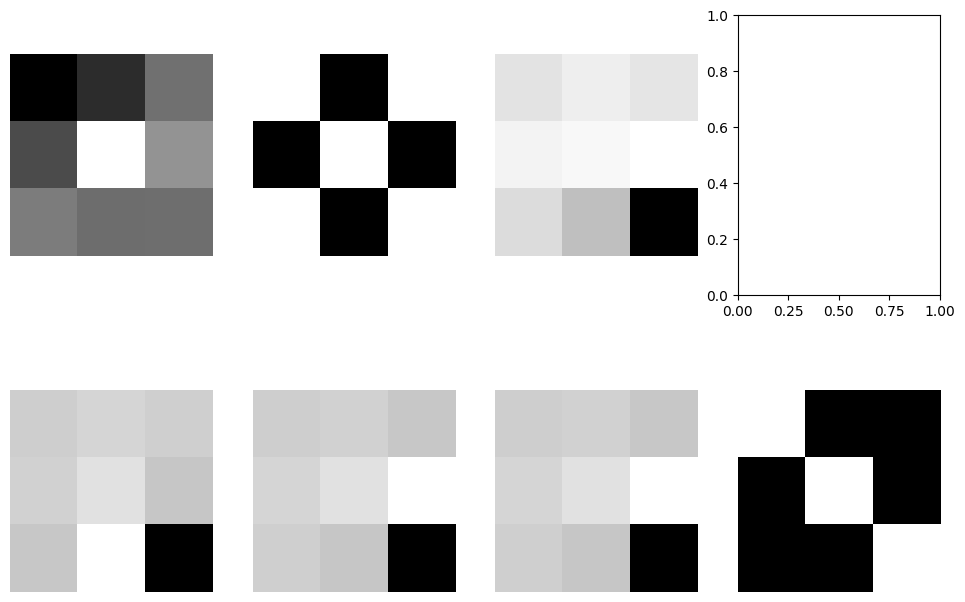

In [36]:
matN = 3
A = np.random.randn(matN,matN)
grid = np.array([(-1)**(x+y) for x in range(0,matN) for y in range(0,matN)]).reshape(matN,matN)

minors = np.zeros((matN,matN))
for i in range(matN):
    for j in range(matN):
        top=np.hstack((A[:i,:j],A[:i,j+1:]))
        bot=np.hstack((A[i+1:,:j],A[i+1:,j+1:]))
        minors[i,j]=np.linalg.det(np.vstack((top,bot)))

cofactors= minors*grid

adjugate = cofactors.T/np.linalg.det(A)

I = A@adjugate

fig,axs = plt.subplots(2,4,figsize=(12,8))
axs[0,0].imshow(A,'gray')
axs[0,0].set_axis_off()
axs[0,1].imshow(grid,'gray')
axs[0,1].set_axis_off()
axs[0,2].imshow(minors,'gray')
axs[0,2].set_axis_off()
axs[1,0].imshow(cofactors,'gray')
axs[1,0].set_axis_off()
axs[1,1].imshow(adjugate,'gray')
axs[1,1].set_axis_off()
axs[1,2].imshow(np.linalg.inv(A),'gray')
axs[1,2].set_axis_off()
axs[1,3].imshow(I,'gray')
axs[1,3].set_axis_off()



### One Sided Inverses
A tall matrix doesn't have a full inverse. That is, for a matrix $\mathbf{T}$ of size $M\gt N$, there is no tall matrix $\mathbf{T}^{-1}$ st $\mathbf{TT}^{-1}=\mathbf{T}^{-1}\mathbf{T}=\mathbf{I}$

But there is a matrix $\mathbf{L}$ st $\mathbf{LT}=\mathbf{I}$. To find this matrix, we first make matrix $\mathbf{T}$ square. We do this by multiplying it by its transpose.

So should we compute $\mathbf{T}^T\mathbf{T}$ or $\mathbf{TT}^T$? Both are square.. but $\mathbf{T}^T\mathbf{T}$ is full-rank if $\mathbf{T}$ is full-rank. This is because all full-rank matrices have an inverse.

So we have:

$(\mathbf{T}^T\mathbf{T})^{-1}(\mathbf{T}^T\mathbf{T})=\mathbf{I}$

Note, that $\mathbf{T}^T\mathbf{T}$ is not the same matrix as $\mathbf{T}$, and $(\mathbf{T}^T\mathbf{T})^{-1}$ is not the inverse of $\mathbf{T}$.

However, we're looking for a matrix that left multiplies $\mathbf{T}$ to produce the identity matrix; what other matrices needed are irrelevant.

So we can break apart the above formula to obtain:

$\mathbf{L} = (\mathbf{T}^T\mathbf{T})^{-1}\mathbf{T}^T$<br>
$\mathbf{LT}=\mathbf{I}$

The matrix $\mathbf{L}$ is the *left-inverse* of matrix $\mathbf{T}$.

The Left Inverse is extremely important for fitting statistical models to data and the least squares solution. It is one of the most important topics in linear algebra.

**NOTE**<br>
The left-inverse is only defined for tall matrices that have full column rank. A matrix of size $M\gt N$ with rank $r\lt N$ does not have a left-inverse- This is because, $\mathbf{T}^T\mathbf{T}$ is no longer invertible.

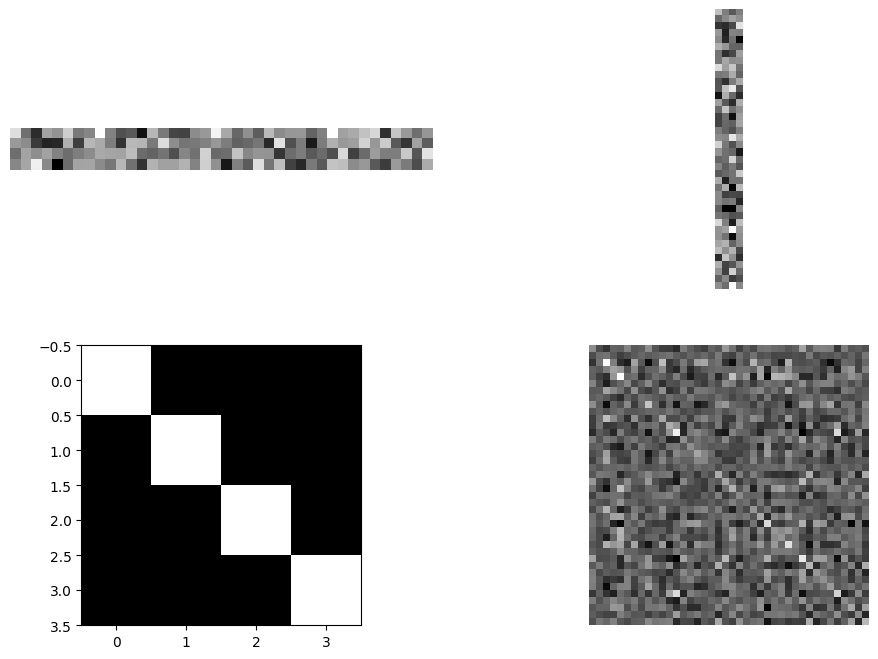

In [58]:
T = np.random.randn(40,4)
TtT = T.T@T
TtT_inv = np.linalg.inv(TtT)
L = TtT_inv@T.T


fig,ax = plt.subplots(2,2,figsize=(12,8))
ax[0,0].imshow(L,'gray')
ax[0,0].set_axis_off()

ax[0,1].imshow(T,'gray')
ax[0,1].set_axis_off()

ax[1,0].imshow(L@T,'gray')

ax[1,1].imshow(T@L,'gray')
ax[1,1].set_axis_off()

#note how the T@L does NOT produce an identiy matrix, showing how it can only be produced via pre-multiplying
# also note that the left inverse is square

### The Inverse is Unique
The matrix inverse is unique, meaning that if a matrix has an inverse, it has exactly one inverse. There cannot be two matrices $\mathbf{B}$ and $\mathbf{C}$ such that $\mathbf{AB}=\mathbf{I}$ and $\mathbf{AC}=\mathbf{I}$ while $\mathbf{B}\neq\mathbf{C}$.

We can prove this via *proof by negation*. We start with three assumptions:
1. matrix $\mathbf{A}$ is invertible
2. matrices $\mathbf{B}$ and $\mathbf{C}$ are inverses of $\mathbf{A}$
3. matrices $\mathbf{B}$ and $\mathbf{C}$ are distinct, meaning $\mathbf{B}\neq\mathbf{C}$

$\mathbf{C} = \mathbf{CI} = \mathbf{CAB} = \mathbf{IB} = \mathbf{B}$

All statements are equal, which means the first and final expressions are equal, which means that our assumption of $\mathbf{B}\neq\mathbf{C}$ is false. The conclusion is that any two matrices that claim to be the inverse of the same matrix are equal.

### Moore-Penrose Pseudoinverse
It is simply impossible to transform a reduced-rank matrix into the identity matrix via matrix multiplication. That means that reduced-rank matrices do not have a full or one-sided inverse. But singular matrices have *pseudoinverses*.

They are transformation matrices that bring a matrix close to the identity matrix. Although the full matrix inverse is unique, the pseudoinverse is not unique. A reduced-rank matrix has an infinite number of pseudoinverses, but some are better than others.

The one used most often is the *Moore-Penrose pseudoinverse*, also called the MP pseudoinverse. This is the most commonly used pseudoinverse.

The following is the pseudoinverse of the singular matrix earlier:

$\begin{bmatrix}1&4\\2&8\end{bmatrix}^\dagger=\frac{1}{85}\begin{bmatrix}1&2\\4&8\end{bmatrix}$

$\begin{bmatrix}1&4\\2&8\end{bmatrix}\frac{1}{85}\begin{bmatrix}1&2\\4&8\end{bmatrix}=\begin{bmatrix}.2&.4\\ .4&.8\end{bmatrix}$

The pseudoinverse is indicated using a dagger, a plus sign or an asterisk in the superscript:

$\mathbf{A}^\dagger,\mathbf{A}^+,\mathbf{A}^*$

The pseudoinverse is implemented in Python using the function `np.linalg.pinv`. The following code computes the pseudoinverse for the singular matrix:

```
A=np.array([ [1,4],[2,8] ])
Apinv = np.linalg.pinv(A)
A@Apinv
```

### Numerical Stability of the Inverse
Computing the matrix inverse involves a lot of FLOPs (floating point operations), including many determinants. The determinant itself can be numerically unstable, and therefore computing many determinants can lead to numerical inaccuracies, which can accumulate and cause significant problems when working with large matrices.

For this reason, low-level libraries that implement numerical computations generally strive to avoid explicitly inverting matrices when possible, or they decompose matrices into the product of other matrices that are more numerically stable.

Matrices that have numerical values in roughly the same range tend to be more stable, which is why random-number matrices are easy to work with. However, matrices with a large range of numerical values have a high risk of numerical instability.

The 'range of numerical values' is more formally captured as the *condition number* of a matrix, which is the ratio of the largest to smallest singular value. It is a measure of the spread of numerical values in a matrix.

An example of a numerically unstable matrix is a Hilbert matrix. Each element of a Hilbert matrix is defined by the simple formula:

$h_{i,j} = \frac{1}{i+j-1}$

Here is a $3\times 3$ Hilbert matrix:
\begin{bmatrix}1&1/2&1/3\\ 1/2&1/3&1/4\\ 1/3&1/4&1/5\end{bmatrix}

As the matrix gets larger, the range of numerical values increases. As a consequence, the computer-calculated Hilbert matrix quickly becomes rank-deficient. Even full-rank Hilbert matrices have inverses in a very different numerical range.

### Geometric Interpretation of the Inverse
We can think of the matrix inverse as undoing the geometric transformation imposed by matrix multiplication.

In the following example, $\mathbf{P}$ is the $2\times N$ matrix of original geometric coordinates, $\mathbf{T}$ is the transformation matrix, and $\mathbf{Q}$ is the matrix of transformed coordinates, and $\mathbf{U}$ is the matrix of back-transformed coordinates.

$\mathbf{Q} = \mathbf{TP}$<br>
$\mathbf{U} = \mathbf(T)^{-1}\mathbf{Q}$<br>
$\mathbf{U} = \mathbf{T}^{-1}\mathbf{TP}$

The geometric intuition of the matrix inverse is undoing the transform imposed by the original matrix. 

This also provides some geometric interpretation for why a reduced-rank matrix has no inverse- the geometric effect of transforming by a singular matrix is that at least one dimension is flattened. Once a dimension is flattened, it cannot be unflattened (that information is lost).

[(-2.0, 2.0), (-2.0, 2.0)]

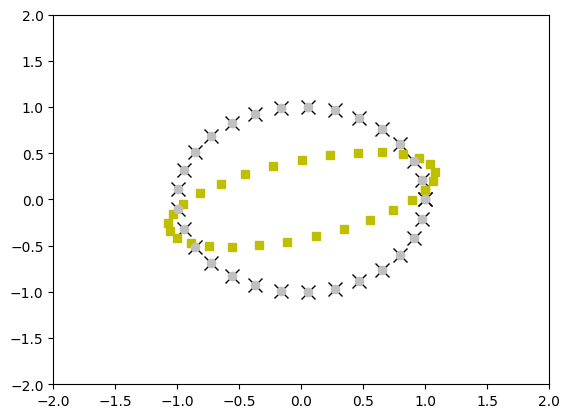

In [46]:
theta = np.linspace(0,2*np.pi,30)
A = np.array([np.cos(theta),np.sin(theta)])

T = np.array([[1,.4],[.1,.5]])
Tinv = np.linalg.inv(T)
X = T@A
Y = Tinv@X

fig,ax = plt.subplots()
ax.plot(A[0,:],A[1,:],marker='x',color='k',ls='',ms=10)
ax.plot(X[0,:],X[1,:],marker='s',coblor='y',ls='')
ax.plot(Y[0,:],Y[1,:],marker='o',color='silver',ls='')
ax.set(xlim=(-2,2),ylim=(-2,2))

[(-2.0, 2.0), (-2.0, 2.0)]

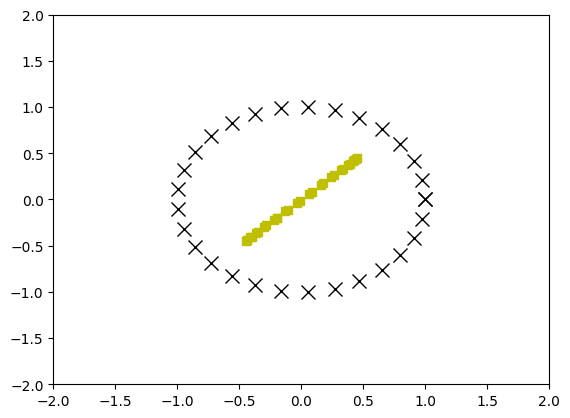

In [59]:
theta = np.linspace(0,2*np.pi,30)
A = np.array([np.cos(theta),np.sin(theta)])

T = np.array([[-.2,-.4],[-.2,-.4]])
X = T@A

fig,ax = plt.subplots()
ax.plot(A[0,:],A[1,:],marker='x',color='k',ls='',ms=10)
ax.plot(X[0,:],X[1,:],marker='s',color='y',ls='')
ax.set(xlim=(-2,2),ylim=(-2,2))